In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
records = pd.read_csv('../data/fucking_final_dataset.csv')
records = records[records.pub_year > 1799]
records = records[records.pub_year < 1900]

In [4]:
len(records)

465859

In [5]:
records.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,Unnamed: 0.1.1,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,title_auth_slug,canonical_title,canonical_author,slug,canonical_city,canonical_country,full_text_slug
8,8,9,9,9,10085221,cuba,NaN,"norton, francis l",publisher not identified,new york,1873,NaN,NaN,"cuba|norton, francis l",cuba,"norton, francis l","new york,usa",new york,usa,"cuba,norton, francis l,new york,1873,publisher..."


In [6]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)

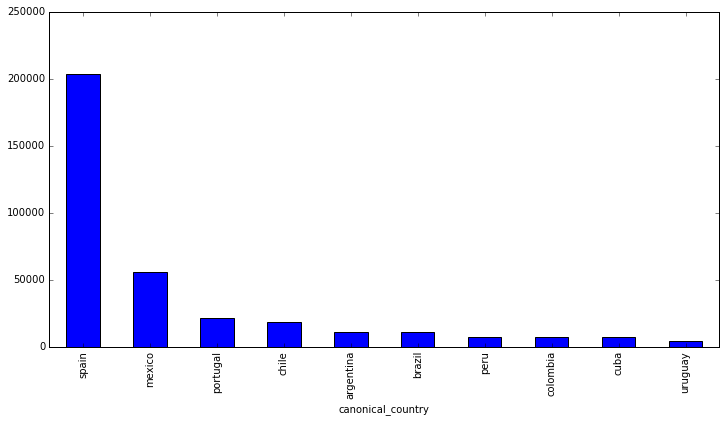

In [7]:
records.groupby('canonical_country').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].plot(kind="bar")

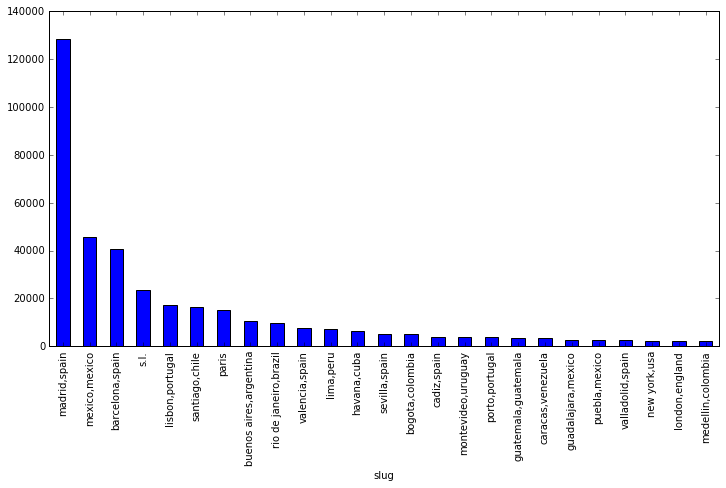

In [19]:
records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:25].plot(kind="bar")

## Global Publication By Year

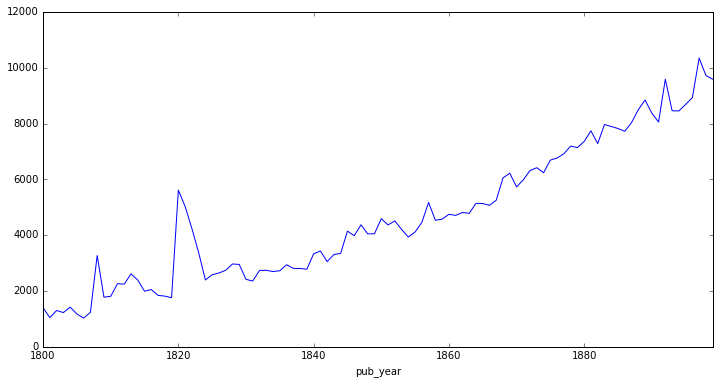

In [9]:
records.sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [14]:
top_slugs = records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:11].index
top_slugs

Index(['madrid,spain', 'mexico,mexico', 'barcelona,spain', 's.l.',
       'lisbon,portugal', 'santiago,chile', 'paris', 'buenos aires,argentina',
       'rio de janeiro,brazil', 'valencia,spain', 'lima,peru'],
      dtype='object', name='slug')

In [15]:
top_producers = records[records.slug.isin(top_slugs)]

In [16]:
group_top_producers = top_producers.sort_values('pub_year').groupby(['slug', 'pub_year']).count()['control_number']

In [20]:
top_producer_df = pd.DataFrame({
    'madrid,spain': group_top_producers.ix['madrid,spain'],
    'mexico,mexico': group_top_producers.ix['mexico,mexico'],
    'barcelona,spain': group_top_producers.ix['barcelona,spain'],
    'lisbon,portugal': group_top_producers.ix['lisbon,portugal'],
    'santiago,chile': group_top_producers.ix['santiago,chile'],
    'buenos aires,argentina': group_top_producers.ix['buenos aires,argentina'],
    'rio de janeiro,brazil': group_top_producers.ix['rio de janeiro,brazil'], 
    'lima,peru': group_top_producers.ix['lima,peru'],
    'valencia,spain': group_top_producers.ix['valencia,spain'],
    'paris': group_top_producers.ix['paris'],
})

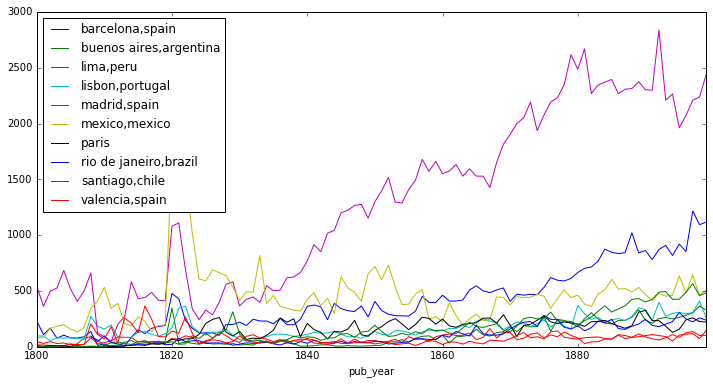

In [21]:
top_producer_df.plot()

In [23]:
counted_by_year = records.sort_values('pub_year').groupby('pub_year').count()['control_number']

In [24]:
top_producer_df_percent = pd.DataFrame({
    'madrid,spain': top_producer_df['madrid,spain'].divide(counted_by_year.values),
    'mexico,mexico': top_producer_df['mexico,mexico'].divide(counted_by_year.values),
    'barcelona,spain': top_producer_df['barcelona,spain'].divide(counted_by_year.values),
    'lisbon,portugal': top_producer_df['lisbon,portugal'].divide(counted_by_year.values),
    'santiago,chile': top_producer_df['santiago,chile'].divide(counted_by_year.values),
#     'buenos aires,argentina': top_producer_df['buenos aires,argentina'].divide(counted_by_year.values),
#     'rio de janeiro,brazil': top_producer_df['rio de janeiro,brazil'].divide(counted_by_year.values), 
#     'lima,peru': top_producer_df['lima,peru'].divide(counted_by_year.values),
#     'valencia,spain': top_producer_df['valencia,spain'].divide(counted_by_year.values),
#     'havana,cuba': top_producer_df['havana,cuba'].divide(counted_by_year.values),
})

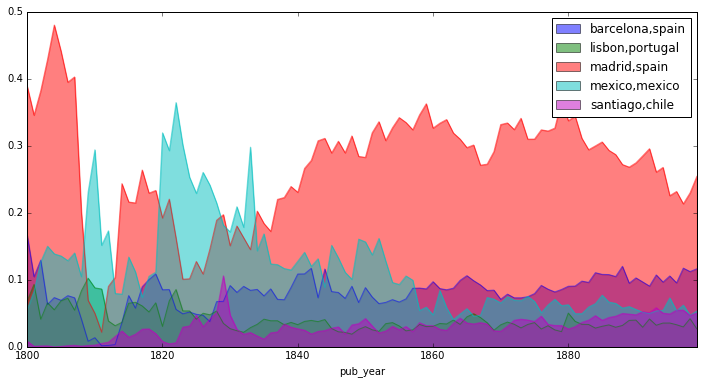

In [25]:
top_producer_df_percent.plot.area(stacked=False)